# Installing and getting data set from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssefmis","key":"cfe11a13c69a07f105ab04e990c1026c"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
%ls -lha kaggle.json

-rw-r--r-- 1 root root 66 May 28 21:41 kaggle.json


In [3]:
# Next, install the Kaggle API client.
%pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
%mkdir -p ~/.kaggle
%cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          21841        606  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23            940         23  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2375         56  1.0              
darshanprabhu09/stock-prices-f

In [6]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d khaled100233/chest-ct-cleaned

 98% 97.0M/98.8M [00:00<00:00, 188MB/s]
100% 98.8M/98.8M [00:00<00:00, 189MB/s]


In [7]:
!unzip chest-ct-cleaned.zip

Archive:  chest-ct-cleaned.zip
  inflating: data-set/test/adenocarcinoma/000108 (3).png  
  inflating: data-set/test/adenocarcinoma/000109 (2).png  
  inflating: data-set/test/adenocarcinoma/000109 (4).png  
  inflating: data-set/test/adenocarcinoma/000109 (5).png  
  inflating: data-set/test/adenocarcinoma/000112 (2).png  
  inflating: data-set/test/adenocarcinoma/000113 (7).png  
  inflating: data-set/test/adenocarcinoma/000114 (5).png  
  inflating: data-set/test/adenocarcinoma/000114.png  
  inflating: data-set/test/adenocarcinoma/000115 (4).png  
  inflating: data-set/test/adenocarcinoma/000115 (8).png  
  inflating: data-set/test/adenocarcinoma/000115.png  
  inflating: data-set/test/adenocarcinoma/000116 (5).png  
  inflating: data-set/test/adenocarcinoma/000116 (7).png  
  inflating: data-set/test/adenocarcinoma/000116 (9).png  
  inflating: data-set/test/adenocarcinoma/000117 (4).png  
  inflating: data-set/test/adenocarcinoma/000117 (8).png  
  inflating: data-set/test/adenoc

# Preparing Dataset

#### Importing Libraries

In [8]:
from PIL import Image , ImageEnhance , ImageOps
import cv2
import pandas as pd
import numpy as np
import os
from os import getcwd, path, listdir
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

#### getting the path of the data set

In [9]:
path_real = getcwd()
print(path_real)

/content


In [10]:
path = os.path.join(path_real, "data-set/train")
test_path = os.path.join(path_real, "data-set/test")
validation_path = os.path.join(path_real, "data-set/valid")
path

'/content/data-set/train'

In [11]:
ls_types = listdir(path)
ls_types

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']

In [12]:
df = pd.DataFrame(columns= ['image','type'])
#test_df = validation_df = df
test_df = pd.DataFrame(columns= ['image','type'])
validation_df = pd.DataFrame(columns= ['image','type'])
df

,image,type


#### loading images' paths into dataframe

In [13]:
###-----
def loadDf(fdf, fpath, fls_types):
    for i in fls_types:
        #print(i)
        #print(df.columns[1], i )
        tmp_path = os.path.join(fpath, i)
        tmp_ls = listdir(tmp_path)
        for j in tmp_ls:
            fdf.loc[len(fdf),:] = [tmp_path + "//" + j , i]     
        #print(tmp_path)

    # Path refining for usage purpose
    fdf['image'] = fdf['image'].str.replace('\\', '//', regex=False)
    return fdf
###-----
df = loadDf(df, path, ls_types)
test_df = loadDf(test_df, test_path, listdir(test_path))
validation_df = loadDf(validation_df, validation_path, listdir(validation_path))

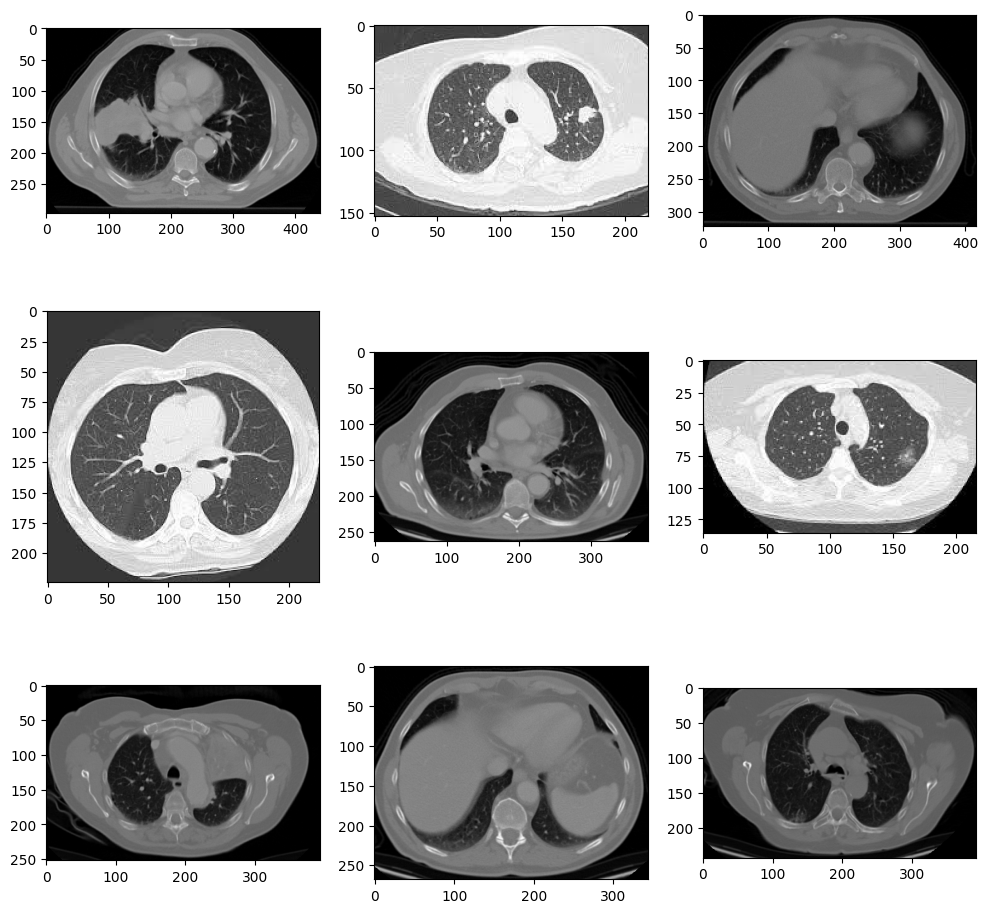

In [14]:
picture_size=300
path="Data/"
folder= ls_types[1]
plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    plt.imshow(load_img(df.iloc[i,0]))
plt.show()

#### Manipulating the images to increase brightness and contrast

In [15]:
def change(url):
    image = Image.open(url)
    size  = 224
    alpha = 1.5       # Simple contrast control
    beta  = 0         # Simple brightness control
    image = image.resize((size,size)) #size of image 
    image = ImageOps.grayscale(image)  # gray scale
    image = np.array(image) # makes a matrix of color values 
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta) # controls contrast and brightness of image
    return image

In [16]:
dic = { ls_types[0] : 2, ls_types[1] : 1, ls_types[2] : 0, ls_types[3] : 3}
dic

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 1,
 'normal': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 3}

In [17]:
test_types= listdir(test_path)
dic_test = { test_types[0] : 3, test_types[1] : 0, test_types[2] : 2, test_types[3] : 1 }

dic_test

{'large.cell.carcinoma': 3,
 'normal': 0,
 'adenocarcinoma': 2,
 'squamous.cell.carcinoma': 1}

#### Preparing the input structure

In [18]:
#initializing 3D array to hold 612 image of size 320*320
#access any image by specifying the image number i => arr_3d[i]
arr_3d = np.ndarray(shape=(612, 224, 224), dtype=int)
test_arr_3d = np.ndarray(shape=(315, 224, 224), dtype=int)
validation_arr_3d = np.ndarray(shape=(72, 224, 224), dtype=int)

yhat = np.array(df.loc[:,'type'].replace(dic))
test_yhat = np.array(test_df.loc[:,'type'].replace(dic_test))
validation_yhat = np.array(validation_df.loc[:,'type'].replace(dic))

#### applying the manipulation to all the images

In [19]:
for i in range(len(df)):
    arr_3d[i] = change(df.iloc[i,0])
    
for i in range(len(test_df)):
     test_arr_3d[i] = change(test_df.iloc[i,0])

for i in range(len(validation_df)):
     validation_arr_3d[i] = change(validation_df.iloc[i,0])

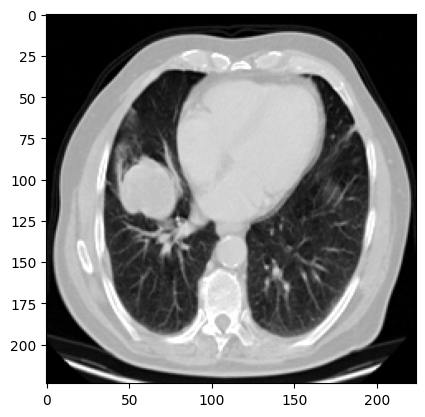

In [20]:
plt.imshow(arr_3d[20],cmap='gray')

In [21]:
#train data
X = arr_3d
y = yhat

#test data
tx = test_arr_3d
ty = test_yhat

#validation data
vx = validation_arr_3d
vy = validation_yhat

In [22]:
yhat

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## test and validation data are done till before here

In [23]:
classes = 4
targety = y.reshape(-1)
y = np.eye(classes)[targety] 


targetVy = vy.reshape(-1)
vy = np.eye(classes)[targetVy] 



targetTy = ty.reshape(-1)
ty = np.eye(classes)[targetTy] 






In [24]:
targetVy

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [25]:
targetTy

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
targety

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Preparing Neural Network model

## Importing Libraries

In [27]:
%pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 12.0 MB/s eta 0:00:00


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from skimage.io import imread, imshow
from skimage.transform import resize

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.activations import sigmoid

from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50, VGG16, ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2

## Making Model
Model is based of VVG16 Architecture with some modifications in layers:

In [29]:
model = Sequential(
    (
      #input shape for the model
      InputLayer(input_shape = (224,224,1), name = 'InputLayer'),

      #First set of layers
      Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'selu',name = 'Conv1_1'),
      Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'selu',name = 'Conv1_2'),
      Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'selu',name = 'Conv1_3'),
      Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'selu',name = 'Conv1_4'),
      Dropout(0.30),
      AveragePooling2D(pool_size=(2,2), strides=2,name = 'AveragePool1'),
     
      #Second set of layers
      Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv2_1'),
      Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv2_2'),
      Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv2_3'),
      Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv2_4'),
      Dropout(0.30),
      AveragePooling2D(pool_size=(2,2), strides=2, name='AveragePool2'),

      #Third set of layers
      Conv2D(filters = 256, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv3_1'),
      Conv2D(filters = 256, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv3_2'),
      Conv2D(filters = 256, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv3_3'),
      Dropout(0.30),
      AveragePooling2D(pool_size=(2,2), strides=2, name = 'AveragePool3'),
     
      #Fourth set of layers
      Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv4_1'),
      Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv4_2'),
      Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'selu', name='Conv4_3'),
      Dropout(0.30),
      AveragePooling2D(pool_size=(2,2), strides=2, name = 'MaxPool4'),
     
      #Fifth set of layers
      # Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'relu', name='Conv5_1'),
      # Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'relu', name='Conv5_2'),
      # Conv2D(filters = 512, kernel_size=(3,3), padding = 'same', activation = 'relu', name='Conv5_3'),
      # Dropout(0.30),
      # MaxPooling2D(pool_size=(2,2), strides=2, name = 'MaxPool5'),
     
      #Flattening to prepare for fully connected layers
      Flatten(name = 'Flatten'),
     
      BatchNormalization(),

      #Set of fully connected layers
      Dense(4096,activation='relu',name = 'fc6'),
      Dropout(0.5, name='Dropout_1'),
     
      Dense(4096,activation = 'relu',name = 'fc7'),
      Dropout(0.5,name='Dropout_2'),
     
      Dense(1000,activation = 'relu', name = 'fc8'),
      Dropout(0.5,name = 'Dropout_3'),
     
      #output layer
      Dense(4,activation='softmax',name = 'OutputLayer')
    )
)

### Displaying model stats

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      640       
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 Conv1_3 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 Conv1_4 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 AveragePool1 (AveragePoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                        

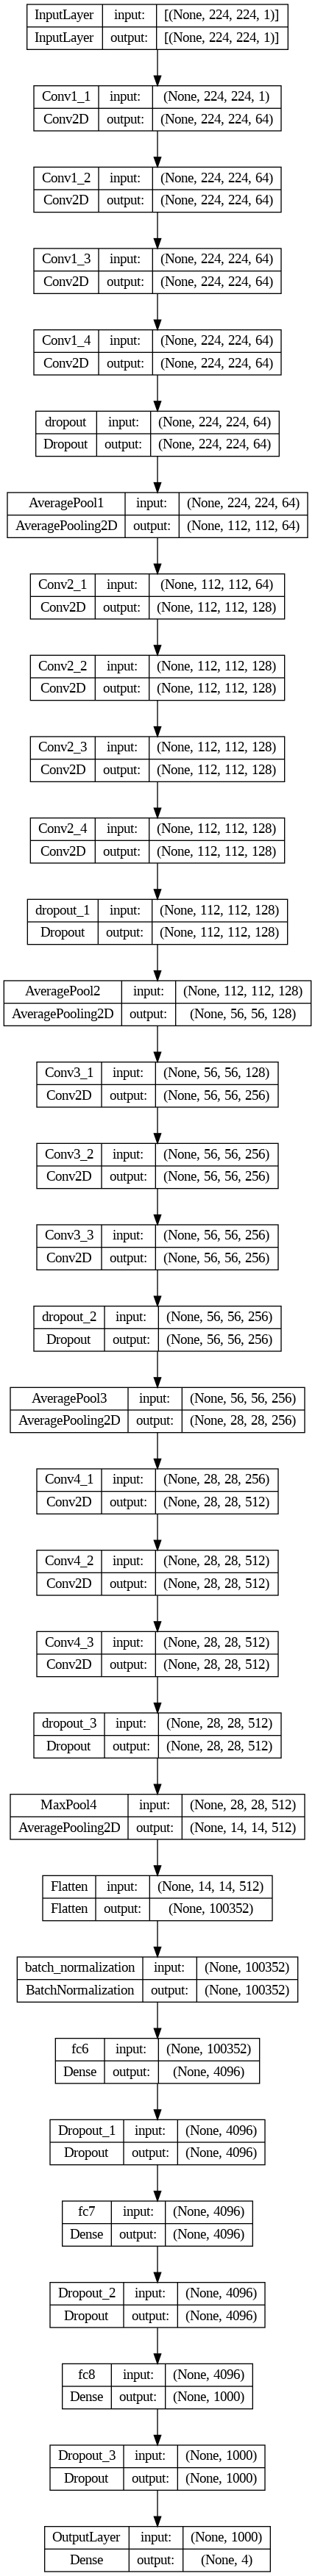

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, show_shapes=True,show_layer_names=True)

### Model compilation

In [32]:
model.compile(loss=CategoricalCrossentropy(),
              optimizer=SGD(0.0008),
              metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),  
        tf.keras.metrics.AUC(name='auc')
        ])

In [33]:
history = model.fit(X,y,epochs=60 ,validation_data=(vx,vy))

Epoch 1/60
20/20 [==============================] - 47s 1s/step - loss: 2.1446 - accuracy: 0.7018 - precision: 0.3878 - recall: 0.3333 - auc: 0.6280 - val_loss: 3.3810 - val_accuracy: 0.6493 - val_precision: 0.2958 - val_recall: 0.2917 - val_auc: 0.5744
Epoch 2/60
20/20 [==============================] - 20s 998ms/step - loss: 1.6633 - accuracy: 0.7553 - precision: 0.5124 - recall: 0.4379 - auc: 0.7286 - val_loss: 1.7080 - val_accuracy: 0.7257 - val_precision: 0.4493 - val_recall: 0.4306 - val_auc: 0.7041
Epoch 3/60
20/20 [==============================] - 20s 1s/step - loss: 1.6456 - accuracy: 0.7529 - precision: 0.5064 - recall: 0.4510 - auc: 0.7425 - val_loss: 2.6011 - val_accuracy: 0.6667 - val_precision: 0.3333 - val_recall: 0.3333 - val_auc: 0.7074
Epoch 4/60
20/20 [==============================] - 20s 976ms/step - loss: 1.4238 - accuracy: 0.7717 - precision: 0.5486 - recall: 0.4886 - auc: 0.7891 - val_loss: 1.2817 - val_accuracy: 0.7604 - val_precision: 0.5283 - val_recall: 0.3

In [34]:
model.evaluate(tx,ty)

10/10 [==============================] - 7s 686ms/step - loss: 1.4217 - accuracy: 0.7984 - precision: 0.6101 - recall: 0.5365 - auc: 0.7980


[1.4217458963394165,
 0.7984126806259155,
 0.6101083159446716,
 0.5365079641342163,
 0.7980129718780518]

## Plotting results

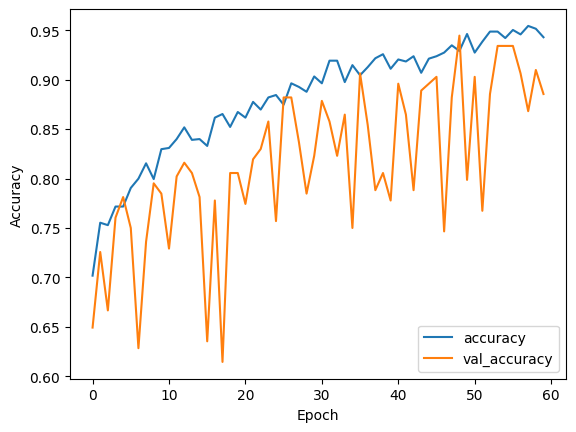

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

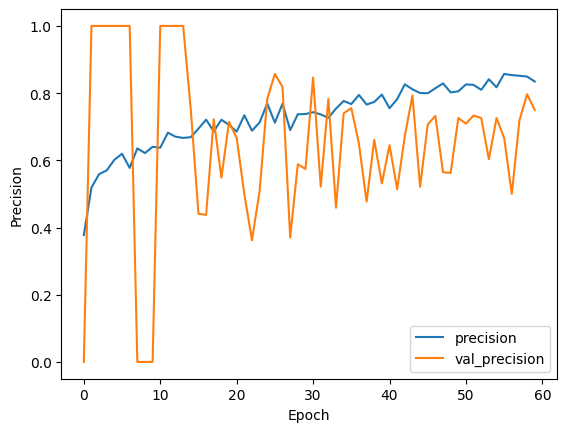

In [ ]:
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='lower right')

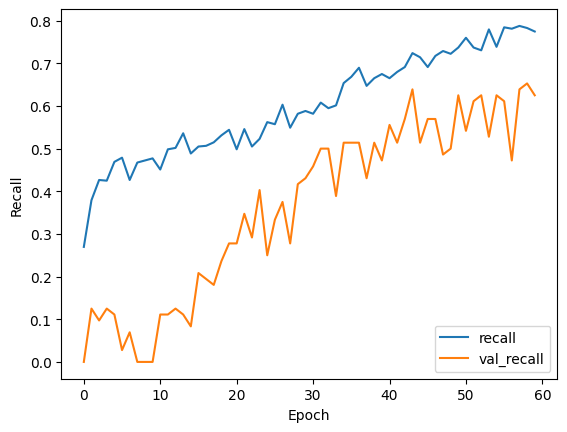

In [ ]:
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(loc='lower right')

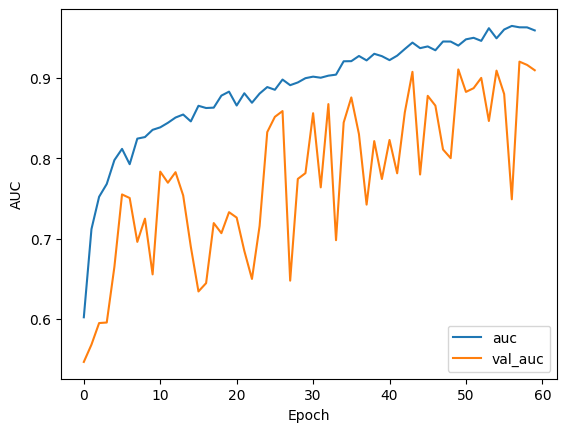

In [ ]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label = 'val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

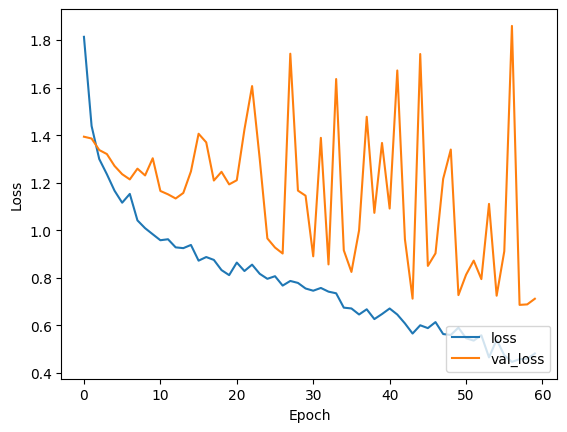

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')